# In this notebook we will take a look at the __Housing Price__ Dataset and implement some Machine Learning Algorithms

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Importing the data

In [2]:
housing = pd.read_csv('D:\Github\My Repository\Machine-Learning-Projects\Data\housing.csv')

## Initial exploration of the data
1. info() -> Gives a list of all the columns along with the data type and count of all non-null values
2. describe() -> Gives statistical breif about the columns

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Things to note:
- All except ocean_proximity column have float values
- total_bedrooms column has some null values

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


This gives an overall understanding about the values within a column
_The analysis ignores any null values_

## Visulazing the data
We will look at the distribution for each column and try to understand a little bit about our data

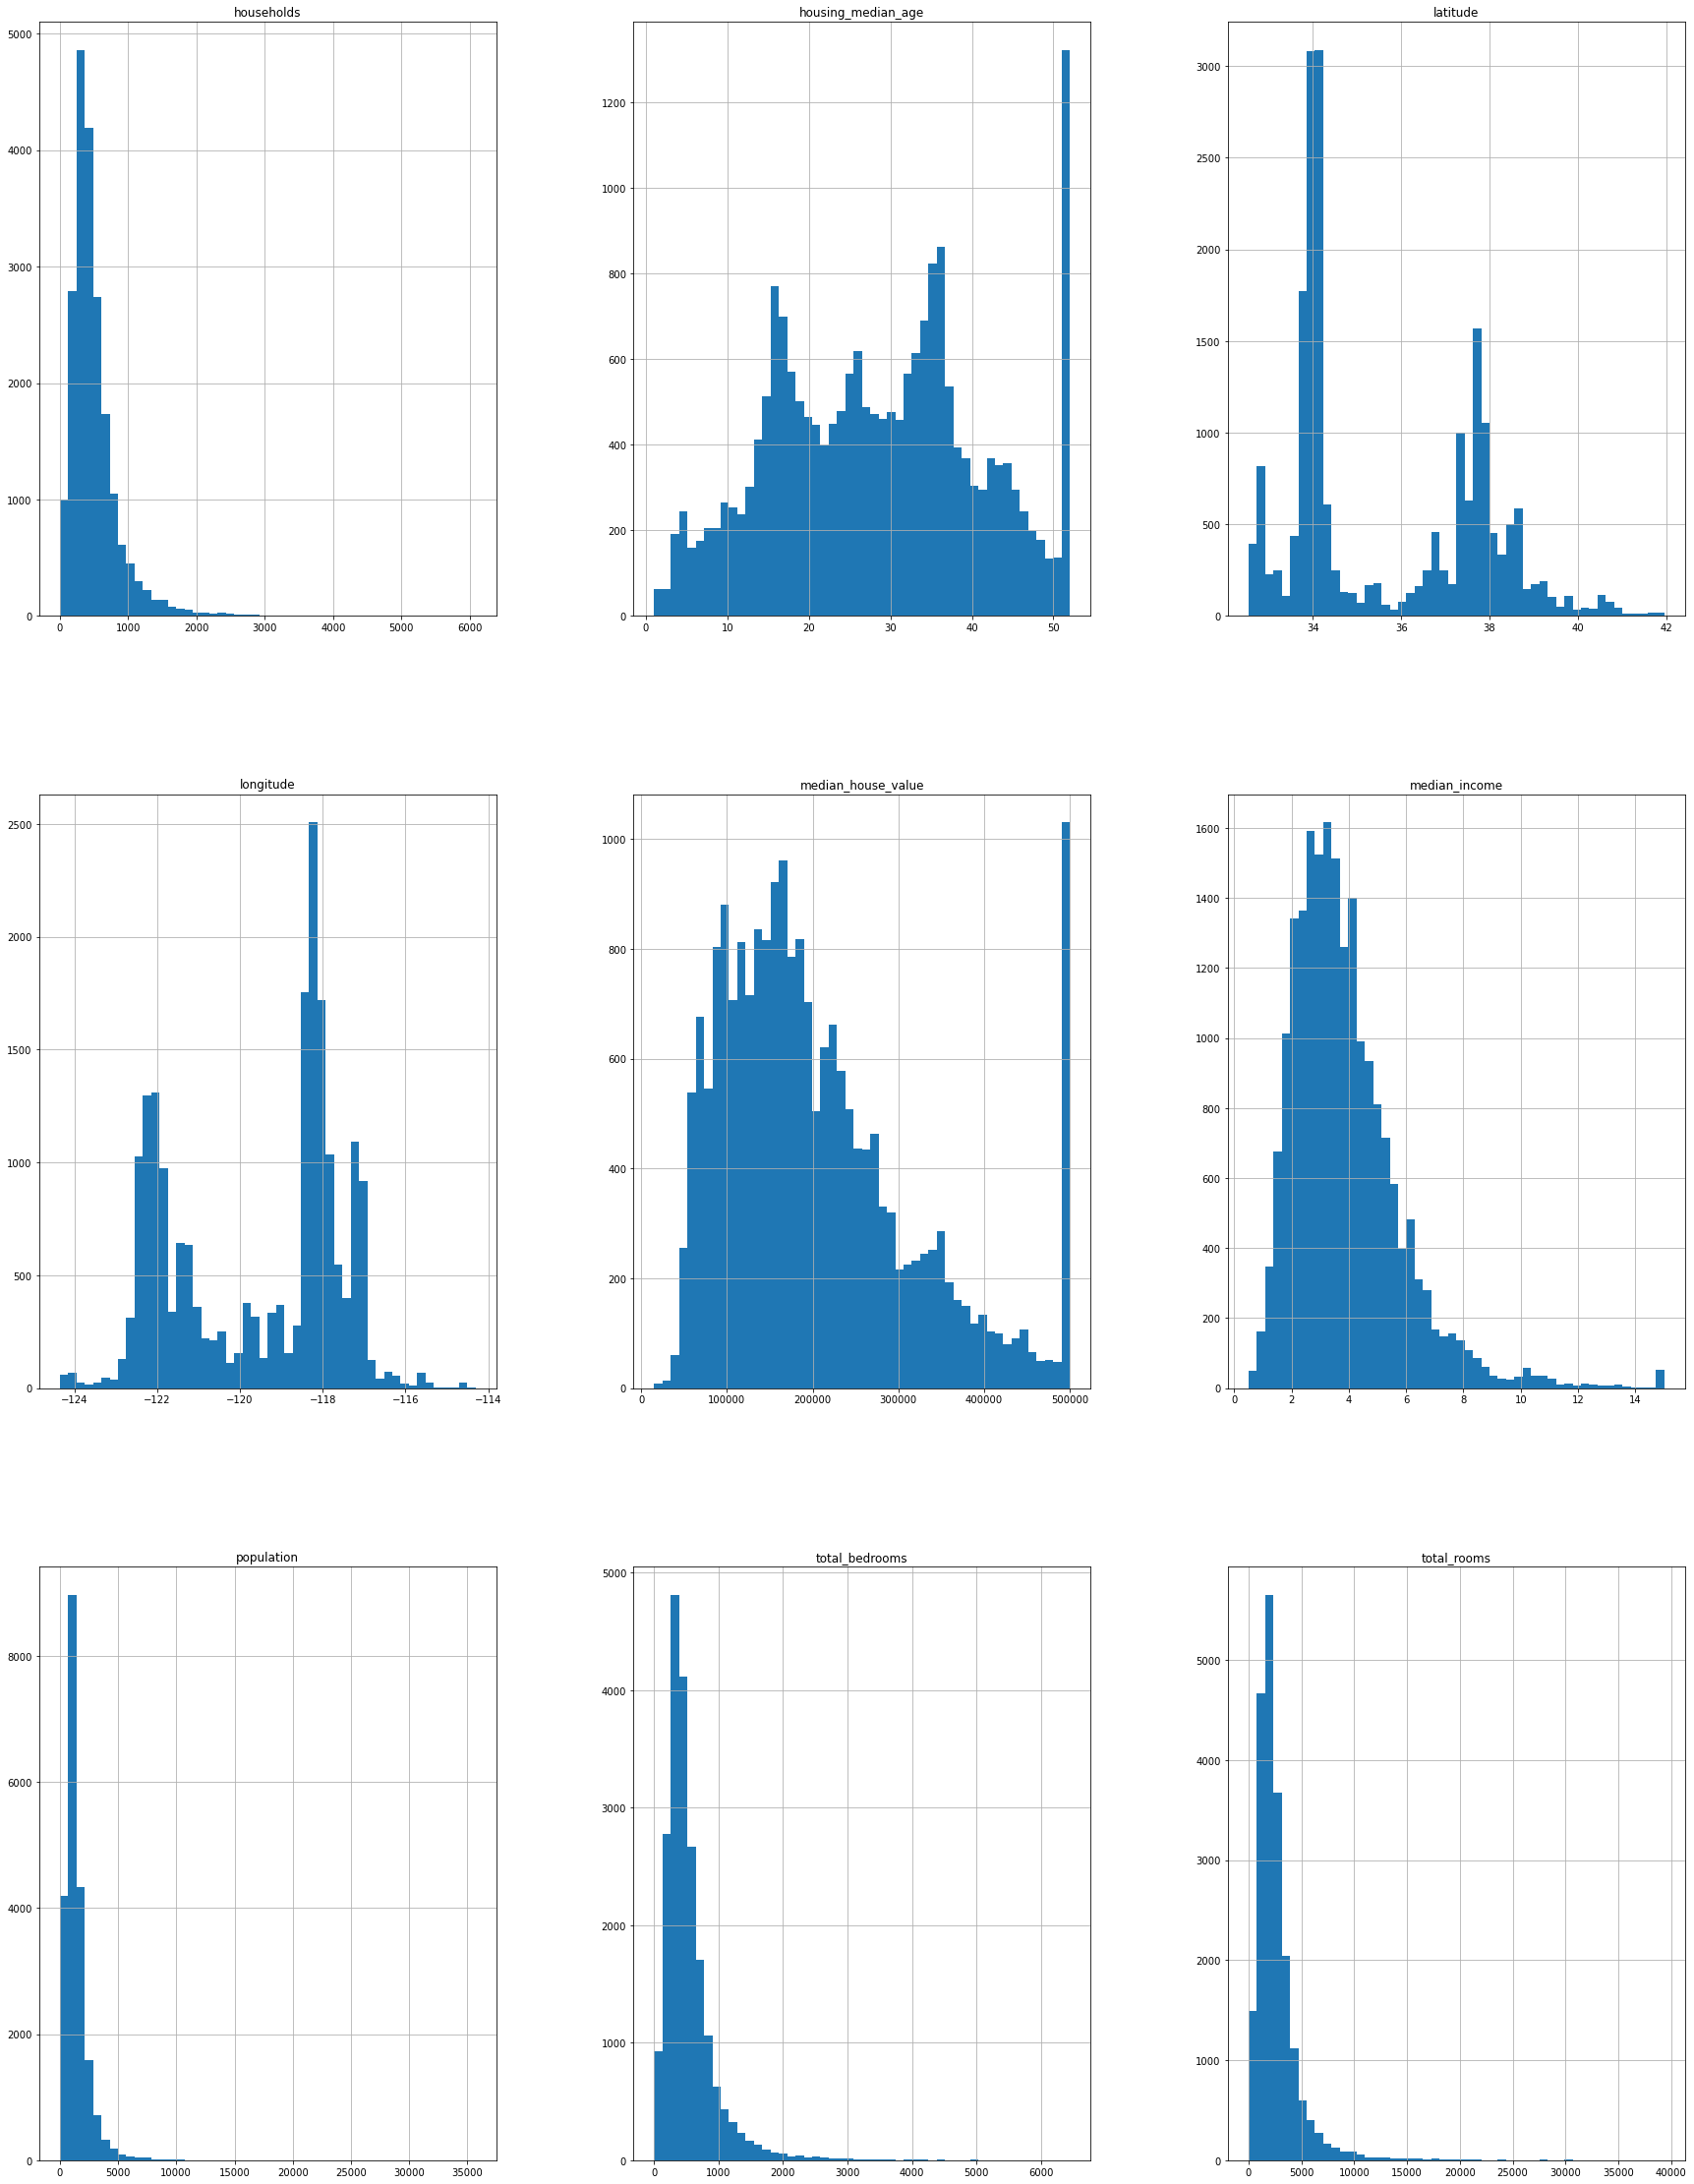

In [5]:
housing.hist(figsize=(30, 40), bins=50)
plt.show()

Things to note:
- `housing_media_age` seems to cap at 50, i.e. any value above 50 is considered 50. We could ask for a detailed data or ignore any row with 50 age
- A similar cap can be seen for `median_house_value`
- `median_income`, `population`, `total_bedrooms` and `total_rooms` are right skewed

Now let's visulaize the data using the longitude and latitude coordinates

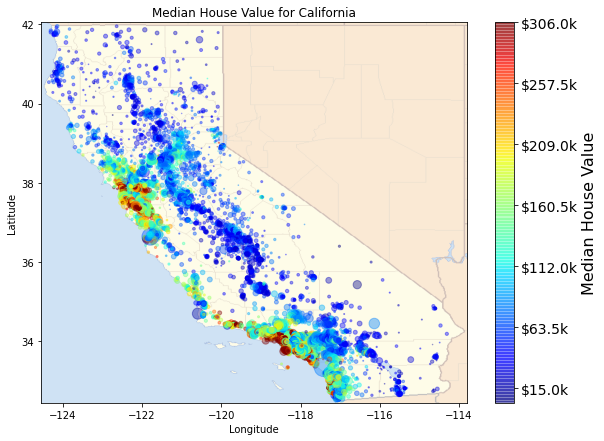

In [6]:
import matplotlib.image as mpimg
california_image = mpimg.imread('D:\Github\My Repository\Machine-Learning\Resources\california.png')
scatter_plot = housing.plot(
    kind='scatter', x='longitude', y='latitude', figsize=(10,7),
    c = 'median_house_value', cmap = 'jet', alpha=0.4, colorbar=False,
    s=housing['population']/100
    )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Median House Value for California')

graph_limts = list(plt.xlim()) + list(plt.ylim())
plt.imshow(california_image, extent=graph_limits, alpha=0.5,
           cmap=plt.get_cmap("jet"))

prices = housing['median_house_value']
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels([f'${round(v/1000, 1)}k' for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.show()

Let's look at the correlation among the columns

In [7]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)  # Since we are only interested in the output

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Things to note:
- `median_income` is very positively correlated with `median_house_value`, which makes sense as income of an individual increases, he/she is willing to pay more for a house
- Looking at location, `latitude` seems to have a strong negative correlation where as `longitude` doesn't have that much impact

## Let's add some more features and check their correlation


In [8]:
data_ = housing.copy()  # Creating a copy for this particular analysis
data_['household_per_population'] = data_['households']/data_['population']
data_['bedrooms_per_room'] = data_['total_bedrooms']/data_['total_rooms']
data_['rooms_per_household'] = data_['total_rooms']/data_['households']
data_['rooms_per_bedroom'] = data_['total_rooms']/data_['total_bedrooms']
data_['population_per_household'] = data_['population']/data_['households']

data_.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_bedroom           0.383920
household_per_population    0.264910
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Things to note:
- Within the 5 new features added, `rooms_per_bedroom`, `household_per_population` and `bedrooms_per_room` seems to have strong correlations
- `rooms_per_household` has a slightly positive correlation
- `population_per_household` has very less negative correlation

We could spend more time and come up with additional features, but for the time being we will work with these features only

## Splitting the data
We need to split the data into training and test set, so that we can trian our models on training set and finally evaluate on the test set. In order to do so we could:
- Use scikit learn `train_test_split` method within `sklearn.model_selection`
- Or, look at the highest correlated column and make sure that it is divided correctly

For this notebook, we will go through the second method. From the previous correlation matrix, we know that `median_income` is very strongly correlated with our output. So let's first look at the distribution for `median_income`

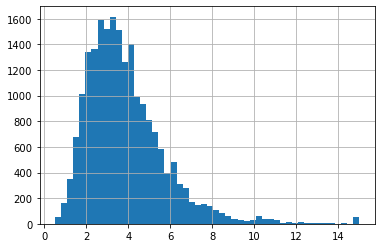

In [9]:
housing['median_income'].hist(bins=50)
plt.show()

Here, we can see it's skewed towards the right side a little. Let's create a new column __median_income_category__ based off `median_income` and cut it in a way that it's normally distributed.

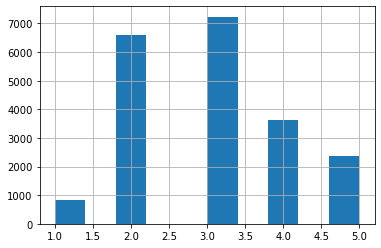

In [10]:
housing['median_income_category'] = pd.cut(housing['median_income'], 
                                        bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                        labels=[1, 2, 3, 4, 5])
housing['median_income_category'].hist()
plt.show()

As we can see that it's closer to a normal distribution, hence we can use this column to split our dataset

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_ix, test_ix in split.split(housing, housing['median_income_category']):
    housing_train = housing.loc[train_ix]
    housing_test = housing.loc[test_ix]

# Let's remove the median_income_category column
for _set in (housing_train, housing_test):
    _set.drop('median_income_category', axis=1, inplace=True)


## Cleaning, Transforming and Preparing our data

Now the data is divided into train and test set, we could start working on cleaning and transforming the data. From our previous analysis we know:
- There are some null values
- We have a categorical column
- We could add some more features which will increase the efficiency of our model

### Let's create a class to add in our additional features:

Let's look at the column indexes and features we want to add.
- household per population
- bedrooms per room
- rooms per household
- population per houshold

From our previous analysis, we know that __population per household__ is the least correlated feature. Hence we can add this as an optional argument in our class.

In [12]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_income_category'],
      dtype='object')

Adding TransformerMixing and BaseEstimator as base class generates some methods on it's own:
- TransformMixing: `fit_transform()`
- BaseEstimator: `get_params()` and `set_params()`

In [13]:
from sklearn.base import TransformerMixin, BaseEstimator
total_rooms_ix, total_bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class addAdditionalAttributes(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_population_per_household=True):
        
        self.add_population_per_household = add_population_per_household
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        household_per_population = X[:, households_ix]/X[:, population_ix]
        bedrooms_per_room = X[:, total_bedrooms_ix]/X[:, total_rooms_ix]
        rooms_per_bedroom = X[:, total_rooms_ix]/X[:, total_bedrooms_ix]
        rooms_per_household = X[:, total_rooms_ix]/X[:, households_ix]
        if self.add_population_per_household:
            population_per_household = X[:, population_ix]/X[:, households_ix]
            return np.c_[X, household_per_population, rooms_per_bedroom, bedrooms_per_room, rooms_per_household, population_per_household]
        else:
            return np.c_[X, household_per_population, rooms_per_bedroom, bedrooms_per_room, rooms_per_household]

Now to clean the data, we could create a pipeline with different steps for numerical and categorical tranformers.
But before that, let's split our label from features:

In [14]:
housing = housing_train.drop('median_house_value', axis=1)
housing_labels = housing_train['median_house_value'].copy()

Now let's get the numerical and categorical features:

In [15]:
num_attributes = list(housing.columns)
num_attributes.remove('ocean_proximity')
cat_attributes = ['ocean_proximity']

Let's tackle the transformations and create a pipeline for both numerical and categorical features

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('attr_adder', addAdditionalAttributes()),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

Now let's combine the two pipelines into one using `ColumnTransformer` method

In [17]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer(transformers=[
    ('nums', num_pipeline, num_attributes),
    ('cats', cat_pipeline, cat_attributes)
])

Now we are ready with all the transformer steps, let's dive into some __Machine Learning__ Algorithms

Let's prepare our data so that we can analyze it using various models

In [18]:
housing_prepared = full_pipeline.fit_transform(housing)

### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

housing_prepared = full_pipeline.fit_transform(housing)
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)  # Fitting the model to the training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's look at the features and values for Linear Regression

In [20]:
print(f'Coeficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')

Coeficients: [-58228.93849321 -60998.18461181  13342.35693418  -4348.59309874
   8393.44959445   2462.8858331    -848.10392466  73515.45306702
  28917.40680399   1841.60475348   7127.56707549   5517.10600831
   -489.61012657 -13940.99943214 -50122.29906285 105640.48260186
 -24105.08033644 -17472.10377043]
Intercept: 234040.94026529999


Now in order to get some prediction, let's create a small validation set:

In [21]:
some_data = housing[:5]
some_data_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

Now let's predict the output using `predict` method:

In [22]:
some_predictions = lin_reg.predict(some_data_prepared)

for original, prediction in zip(some_data_labels, some_predictions):
    print(f'Original Value: {round(original)}')
    print(f'Predicted Value: {round(prediction)}\n')


Original Value: 286600
Predicted Value: 235953.0

Original Value: 340600
Predicted Value: 323452.0

Original Value: 196900
Predicted Value: 231087.0

Original Value: 46300
Predicted Value: 43875.0

Original Value: 254500
Predicted Value: 191290.0



### Evalutating the Model
In order to evaluate the model, we will first get predictions for the training set and use various evlaution techniques to compare the result
- __RMSE__ _Root Mean Squared Error_
    - Root Sum of Squared Distance of the prediction from the actual value.
    - Lesser the better
- __Cross-Validation__

In [23]:
lin_predictions = lin_reg.predict(housing_prepared)

In [24]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(housing_labels, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

65879.1711167482


Here, we can see that RMSE for Linear Regression Model is 65,882. This means, that on an average the prediction is $65,882 off from the actual value. _Also to note, this is on the train set, so score on the test set is bound to be lower than this_

Before tweaking the model, let's try out various other models and once we finalize the best model we can then tweak the parameters.

### Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor

dectree_reg = DecisionTreeRegressor()
dectree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Getting predictions from the `DecisionTreeRegressor` and calculating the RMSE for it

In [26]:
dectreee_predictions = dectree_reg.predict(housing_prepared)
dectree_mse = mean_squared_error(housing_labels, dectreee_predictions)
dectree_rmse = np.sqrt(dectree_mse)
print(dectree_rmse)

0.0


WAIT, WHAT! RMSE for `DecisionTreeRegressor` is 0!!!
This is a clear indication that the model is overfitting the dataset and is performing poorly

Let's try another evaluationg method: __Cross Validation__

In [27]:
from sklearn.model_selection import cross_val_score

dectree_score = cross_val_score(estimator=dectree_reg, X=housing_prepared, y=housing_labels,
                               scoring='neg_mean_squared_error', cv=10)

Now let's look at the scores, mean and std. deviation of the scores

In [28]:
dectree_rmse = np.sqrt(-dectree_score)

print(f'Scores:{dectree_rmse}')
print(f'Mean: {dectree_rmse.mean()}')
print(f'Std Dev: {dectree_rmse.std()}')

Scores:[67317.22979144 67854.58949683 71589.5293899  68561.01823896
 70519.84720424 75181.55447834 69143.49502022 72021.48342787
 75320.82018301 69118.971303  ]
Mean: 70662.85385338096
Std Dev: 2702.399767645295


As we can see the mean error of the `DecisionTreeRegressor` is 70,590.

Now let's evaluate `LinearRegressor` using Cross Validation

In [29]:
linreg_score = cross_val_score(estimator=lin_reg, X=housing_prepared, y=housing_labels,
                              scoring='neg_mean_squared_error', cv=10)
linreg_rmse = np.sqrt(-linreg_score)
print(f'Scores:{linreg_rmse}')
print(f'Mean: {linreg_rmse.mean()}')
print(f'Std Dev: {linreg_rmse.std()}')

Scores:[64538.13230472 64182.01072581 68569.14820812 68166.42875105
 65616.0268226  68796.11506635 64443.77316481 64363.49914171
 69259.25163346 64363.75843765]
Mean: 66229.81442562716
Std Dev: 2063.3373707060377


As we can see, `DecisionTreeRegressor` is perfomering poorly than `LinearRegressor`. Let's look at another model

### Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

ranforreg = RandomForestRegressor()
ranforreg.fit(housing_prepared, housing_labels)
ranforreg_predictions = ranforreg.predict(housing_prepared)

Now let's look at both the evaluation scores

In [31]:
ranfor_mse = mean_squared_error(housing_labels, ranforreg_predictions)
ranfor_rmse = np.sqrt(ranfor_mse)
print(f'RMSE for RandomForestRegressor: {round(ranfor_rmse,2)}')

RMSE for RandomForestRegressor: 18749.7


In [32]:
ranfor_score = cross_val_score(estimator=ranforreg, X=housing_prepared, y=housing_labels,
                              scoring='neg_mean_squared_error', cv=10)
ranfor_rmse = np.sqrt(-ranfor_score)

print(f'Scores:{ranfor_rmse}')
print(f'Mean: {ranfor_rmse.mean()}')
print(f'Std Dev: {ranfor_rmse.std()}')

Scores:[49733.14463807 47419.39231677 50000.80367177 52373.6116611
 49698.09430276 53509.05723568 48569.36542151 47706.97313806
 52900.76660287 50300.84145687]
Mean: 50221.20504454482
Std Dev: 2002.2420865560218


Again, we can see `RandomForestRegressor` has the lowest RMSE score out of the 3 models we tested.
Now instead of trying new models, let's try to fine tune this one.

### Fine Tuning the model

There are few ways we can fine tune the model:
- __Grid Search__: Goes through the given parameter list automatically
- __Randomized Search__: Goes through all the iterations of parameters based on n_iter hyperparameter

### Grid Search:

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameters we need to go through
parameters = [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 10, 12]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(estimator=forest_reg,
                          param_grid=parameters,
                           scoring='neg_mean_squared_error',
                          return_train_score=True)

print(grid_search)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

_Note:_
- _By default, `GridSearchCV` doesn't return training score. That's why we set `return_train_score` to True_

In [34]:
# Fitting the grid_search to our dataset
grid_search.fit(housing_prepared, housing_labels)

print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_features': 10, 'n_estimators': 50}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


As we can see that the best value for `max_feature` is the maximum value within the list, we can then try a new set of values.

One big drawback of this aproach is that, this is a trial method and the output varies depeding on the parameter grid.

Let's evaluate the model and look at the results

In [35]:
cv_results = grid_search.cv_results_
for parameter_, test_score_ in zip(cv_results['params'],cv_results['mean_test_score']):
    print(f'Parameter: {parameter_} | Test Score: {round(np.sqrt(-test_score_), 2)}')

Parameter: {'max_features': 2, 'n_estimators': 3} | Test Score: 65717.17
Parameter: {'max_features': 2, 'n_estimators': 10} | Test Score: 56491.9
Parameter: {'max_features': 2, 'n_estimators': 30} | Test Score: 54265.15
Parameter: {'max_features': 2, 'n_estimators': 50} | Test Score: 53557.66
Parameter: {'max_features': 4, 'n_estimators': 3} | Test Score: 61894.08
Parameter: {'max_features': 4, 'n_estimators': 10} | Test Score: 54189.1
Parameter: {'max_features': 4, 'n_estimators': 30} | Test Score: 51678.33
Parameter: {'max_features': 4, 'n_estimators': 50} | Test Score: 51251.21
Parameter: {'max_features': 6, 'n_estimators': 3} | Test Score: 59730.35
Parameter: {'max_features': 6, 'n_estimators': 10} | Test Score: 52667.86
Parameter: {'max_features': 6, 'n_estimators': 30} | Test Score: 51029.2
Parameter: {'max_features': 6, 'n_estimators': 50} | Test Score: 50625.37
Parameter: {'max_features': 8, 'n_estimators': 3} | Test Score: 60427.17
Parameter: {'max_features': 8, 'n_estimators'

Let's look at the RMSE for the best score

In [36]:
negative_gridsearch_mse = grid_search.best_score_
gridsearch_rmse = np.sqrt(-negative_gridsearch_mse)
gridsearch_rmse

50349.23572449728

### Randomized Search:

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(estimator=forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

Let's look at the result:

In [38]:
print(f'Best Parameter: {rnd_search.best_params_}\n')

rnd_results = rnd_search.cv_results_
for parameter_, test_score_ in zip(rnd_results['params'],rnd_results['mean_test_score']):
    print(f'Parameter: {parameter_} | Test Score: {round(np.sqrt(-test_score_), 2)}')

Best Parameter: {'max_features': 7, 'n_estimators': 180}

Parameter: {'max_features': 7, 'n_estimators': 180} | Test Score: 50139.69
Parameter: {'max_features': 5, 'n_estimators': 15} | Test Score: 52147.62
Parameter: {'max_features': 3, 'n_estimators': 72} | Test Score: 51664.1
Parameter: {'max_features': 5, 'n_estimators': 21} | Test Score: 51528.56
Parameter: {'max_features': 7, 'n_estimators': 122} | Test Score: 50251.36
Parameter: {'max_features': 3, 'n_estimators': 75} | Test Score: 51626.89
Parameter: {'max_features': 3, 'n_estimators': 88} | Test Score: 51602.38
Parameter: {'max_features': 5, 'n_estimators': 100} | Test Score: 50440.98
Parameter: {'max_features': 3, 'n_estimators': 150} | Test Score: 51370.41
Parameter: {'max_features': 5, 'n_estimators': 2} | Test Score: 65091.98


Let's look at the RMSE for the best score

In [39]:
negative_rndsearch_mse = rnd_search.best_score_
rndsearch_rmse = np.sqrt(-negative_rndsearch_mse)
rndsearch_rmse

50139.68714508265

### Analyzing the best model and it's errors

Now let's look at the feature importances of the best model and see if we can reduce some features or not

In [40]:
feature_importance = rnd_search.best_estimator_.feature_importances_
categorical_pipe = full_pipeline.named_transformers_['cats']
cat_attributes = list(categorical_pipe.named_steps['ohe'].categories_[0])
extra_attributes = ['household_per_population', 'rooms_per_bedroom', 'bedrooms_per_room', 'rooms_per_household', 'population_per_household']
attributes = num_attributes + extra_attributes + cat_attributes

sorted(zip(feature_importance, attributes), reverse=True)

[(0.31662507205154744, 'median_income'),
 (0.15171028748670107, 'INLAND'),
 (0.06720748935206818, 'population_per_household'),
 (0.06544031399311541, 'longitude'),
 (0.06438165677637245, 'household_per_population'),
 (0.062074549001202226, 'rooms_per_bedroom'),
 (0.05859617446616892, 'latitude'),
 (0.05562966678405337, 'bedrooms_per_room'),
 (0.042677869423546094, 'rooms_per_household'),
 (0.04122629011806603, 'housing_median_age'),
 (0.014800399606539514, 'total_rooms'),
 (0.01458663987841885, 'population'),
 (0.014235047590007707, 'households'),
 (0.014026008074312729, 'total_bedrooms'),
 (0.010062739293452876, '<1H OCEAN'),
 (0.0036246012064624095, 'NEAR OCEAN'),
 (0.0030472671937363457, 'NEAR BAY'),
 (4.7927704228394793e-05, 'ISLAND')]

Here, we can see the importance of each feature and decide on which features we want to exclude.

### Testing our model on our test data

In [41]:
final_model = rnd_search.best_estimator_

X_test = housing_test.drop('median_house_value', axis=1)
y_test = housing_test['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE for the Final Model: {round(final_rmse, 2)}')

RMSE for the Final Model: 48080.72


We can also calculate a 95% confidence interval for the test RMSE:

In [42]:
from scipy import stats

confidence = 0.95
squared_error = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_error) -1,
                         loc=squared_error.mean(),
                         scale=stats.sem(squared_error)
                        ))

array([46110.52262688, 49973.29651786])

### Additional Topics:
- Full Pipeline with both preparation and prediction
- Full Pipeline with `GridSearchCV` for selecting the imputer parameter

#### Full Pipeline with preparation and prediction

In [43]:
full_pipeline_with_predictor = Pipeline([
    ('preparation', full_pipeline),
    ('linear', LinearRegression())
])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([235953.18260779, 323451.6630675 , 231087.14511302,  43875.00335637,
       191290.34205829])

#### Full Pipeline with `GridSearchCV` for selecting the imputer parameter

In [44]:
full_pipeline_imputer_selection = Pipeline(steps=[
    ('preparation', full_pipeline),
    ('rnd_for_reg', RandomForestRegressor(**rnd_search.best_params_))
])

paramater_grid = [{
    'preparation__nums__impute__strategy': ['mean', 'median', 'most_frequent']
}]

grid_search_prep = GridSearchCV(estimator=full_pipeline_imputer_selection, param_grid=paramater_grid,
                               scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] preparation__nums__impute__strategy=mean ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... preparation__nums__impute__strategy=mean, total=   9.9s
[CV] preparation__nums__impute__strategy=mean ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s


[CV] ......... preparation__nums__impute__strategy=mean, total=   9.3s
[CV] preparation__nums__impute__strategy=mean ........................
[CV] ......... preparation__nums__impute__strategy=mean, total=   9.1s
[CV] preparation__nums__impute__strategy=mean ........................
[CV] ......... preparation__nums__impute__strategy=mean, total=  10.5s
[CV] preparation__nums__impute__strategy=mean ........................
[CV] ......... preparation__nums__impute__strategy=mean, total=   8.5s
[CV] preparation__nums__impute__strategy=median ......................
[CV] ....... preparation__nums__impute__strategy=median, total=   8.8s
[CV] preparation__nums__impute__strategy=median ......................
[CV] ....... preparation__nums__impute__strategy=median, total=   8.0s
[CV] preparation__nums__impute__strategy=median ......................
[CV] ....... preparation__nums__impute__strategy=median, total=   7.8s
[CV] preparation__nums__impute__strategy=median ......................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('nums',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('impute',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                     

In [45]:
grid_search_prep.best_params_

{'preparation__nums__impute__strategy': 'median'}